1- get the performance of FL : global model accuracy through  rounds

10     45.00
23     64.60
39     64.23
49     70.00
62     73.46
73     78.33
87     84.00
101    79.17
111    87.00
123    87.88
133    86.54
145    83.85
154    84.78
164    87.29
176    81.76
186    82.00
198    82.86
211    87.89
220    84.78
232    84.78
244    81.76
255    84.78
266    81.76
277    86.54
288    88.60
298    81.67
308    83.12
320    84.00
329    85.48
343    87.50
Name: accuracy, dtype: float64


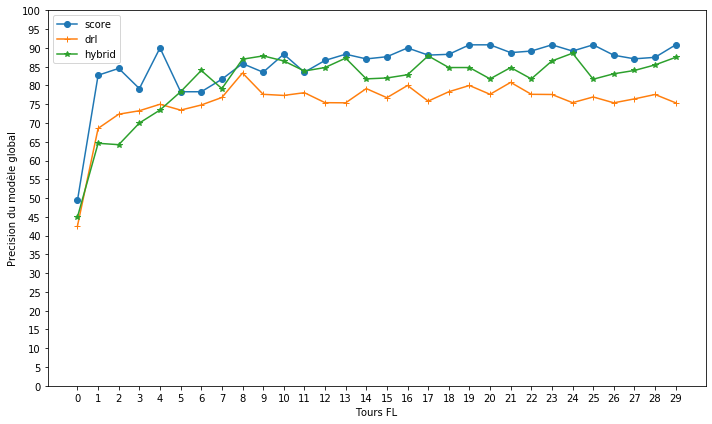

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df2 = pd.read_csv('../results/second_try/score/drp50_mlc_30/models.csv') 
df5 = pd.read_csv('../results/second_try/drl/drp_50_mlc_30/models.csv') 
df8 = pd.read_csv('../results/second_try/hybrid/drp_50_mlc_30/models.csv')  # Replace 'your_csv_file.csv' with your actual file name
# df52 = pd.read_csv('../models.csv') 
# df55 = pd.read_csv('../models.csv') 
# df58 = pd.read_csv('../models.csv')  # Replace 'your_csv_file.csv' with your actual file name


# Filter rows with type=2
filtered_df2 = df2[df2['type'] == 2]
filtered_df2 = filtered_df2[1:]

filtered_df5 = df5[df5['type'] == 2]
filtered_df5 = filtered_df5[1:]

filtered_df8 = df8[df8['type'] == 2]
filtered_df8 = filtered_df8[1:]

# filtered_df52 = df52[df52['type'] == 2]
# filtered_df52 = filtered_df52[1:]

# filtered_df55 = df55[df55['type'] == 2]
# filtered_df55 = filtered_df55[1:]

# filtered_df58 = df58[df58['type'] == 2]
# filtered_df58 = filtered_df58[1:]

# Extract accuracy values
accuracies2 = filtered_df2['accuracy']
accuracies5 = filtered_df5['accuracy']
accuracies8 = filtered_df8['accuracy']

# accuracies52 = filtered_df52['accuracy']
# accuracies55 = filtered_df55['accuracy']
# accuracies58 = filtered_df58['accuracy']

index = filtered_df2['round']

# print(accuracies2)
# print(accuracies52)

# print(accuracies5)
# print(accuracies55)

print(accuracies8)
# print(accuracies58)
# print(accuracies)
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(index, accuracies2, marker='o', label="score")
plt.plot(index, accuracies5, marker='+', label="drl")
plt.plot(index, accuracies8, marker='*', label="hybrid")
# plt.plot(index, accuracies52, marker='o', label="α=0.2")
# plt.plot(index, accuracies55, marker='+', label="α=0.5")
# plt.plot(index, accuracies58, marker='*', label="α=0.8")
# plt.title("comparaison des trois approches avec 300 noeuds")
plt.xlabel('Tours FL')
plt.ylabel('Precision du modèle global')
plt.yticks(range(0, 101, 5))
plt.xticks(range(0,30, 1))
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
import json
import numpy as np
with open("../../../blockchain.json",'r') as f:
    data = json.load(f)

In [13]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# # Print honesty values for each node in a single line
# for node_id in range(0, 50):  # Assuming node IDs are from 1 to 100
#     if node_id in honesty_values_dict:
#         honesty_list = honesty_values_dict[node_id]
#         if len(honesty_list)==7 :
#             honesty_list.append(honesty_list[-1])
#         print(f"Node {node_id}: {honesty_list}")
#     else:
#         print(f"Node {node_id}: No honesty values")


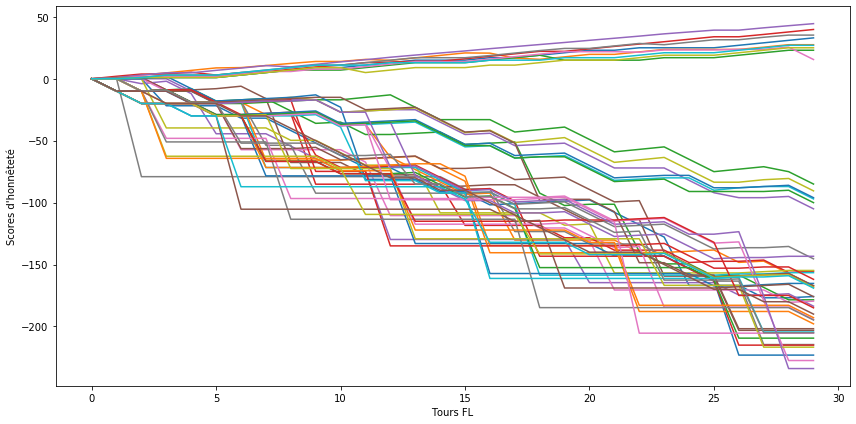

In [14]:
import matplotlib.pyplot as plt

# Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())

block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))


# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(index, honesty_values, label=f'Node {node_id}')

plt.xlabel('Tours FL')
plt.ylabel("Scores d'honnêteté")
# plt.title('Honesty Values for each Node with Score selection')
# plt.legend()
# plt.xticks(rotation=45)

# y_ticks = np.arange(-15, 11, 1)
# y_tick_labels = [f'{tick:.0f}' for tick in y_ticks]
# plt.yticks(y_ticks, y_tick_labels)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()

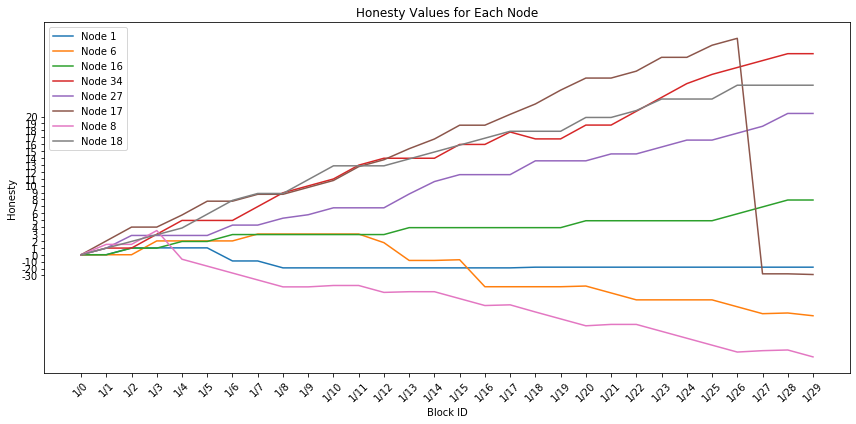

In [16]:
y = [-3, -2, -1, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y_ticks = [-30, -20,-10, 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Custom y-axis tick values


def process_y_values(y_values):
    return [y / 10 if y < 0 else y for y in y_values]



specific_node_ids = [1,6,16,34,27,17,8,18]  

# Prepare data for plotting
# node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, process_y_values(honesty_values), label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(y, y_ticks)
# plt.yscale('logit')
plt.tight_layout()

# Show or save the plot
plt.show()